# Understanding the nature of our Quantum Reservoir.

## Datasets

For this study we chose 3 diffrent datasets to test models on. Two synthetic, with known dynamics --- NARMA and Mackey Glassm, and one with unknown ones --- Santa Fe, all typically used in benchmarking Reservoir computing [wringeReservoirComputingBenchmarks2025]. 


based on [wringeReservoirComputingBenchmarks2025]

### NARMA-N

NARMA-N (Nonlinear Auto-Regressive Moving Average):
- imitation task (based on [wringeReservoirComputingBenchmarks2025])
- modeling time series based on Auto-Regressive (AR) and Moving Average (MA) models
- known dynamics: 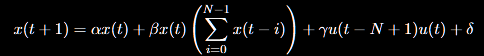
- different N α β γ δ input params in literature
- Can be used for testing non-linear memory capacity --- it could be said that if NARMA-N is learned by model then it has memory capacity of N

### Mackey–Glass
- **Task type:** prediction (based on [wringeReservoirComputingBenchmarks2025])
- **Origin:** derived from a delay differential equation introduced to model physiological systems
- **Biological models:** originally continuous (e.g. breathing rhythms, leukocyte production)
- **Benchmark form:** for reservoir computing we use the discretized, normalized version of the equation
- 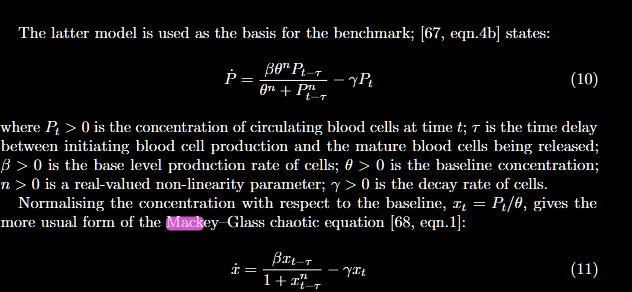
- 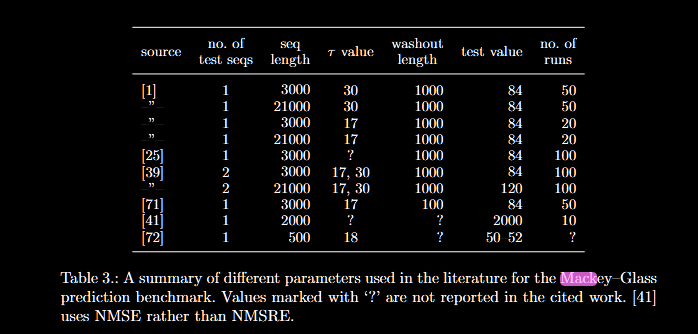


### Santa Fe
- prediction task (based on [wringeReservoirComputingBenchmarks2025])
- unknown dynamics
- produced by trying to achive Lorenz chaos experimentally with lasers
- The original dataset was only 1000 data points long, the shortest of the datasets distributed in the competition. It was also noted for being stationary, low dimensional, clean, scalar-based, and nonlinear. A particularity of the dataset is that the data is characterised by catastrophes: the values grow in a somewhat predictable manner, until one of these catastrophes take place and the values change drastically. See figures 12 and 13.
- 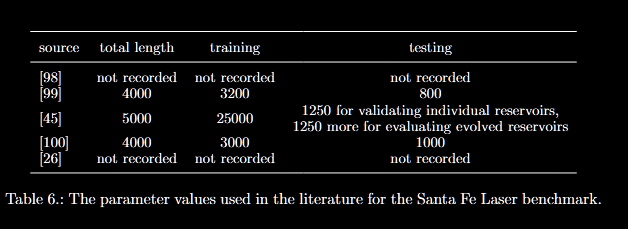
 
## Tasks
3.1.1. Imitation tasks

In an imitation task (see Figure 2), the Reservoir Computer is trained to replicate the dynamics of an open dynamical system, one with inputs. As such, it is given the same time series input as is given to the target dynamical system. This input may, for example, be uniform random noise, such as with NARMA (section 4.1), or a regular frequency signal, such as used in the classic sine wave generation task. The reservoir is then trained to produce the same time series output that the target system produces. The performance of a Reservoir Computer on imitation tasks can be tested in two different ways. The first of these is to measure the error between the reservoir output values and the desired output values. In an imitation task, the desired output values are the output of the dynamical system being imitated. If the dynamical system being imitated is part of a greater whole, such as the control system of a robot, then another adequate test may be, ‘can the trained reservoir adequately replace the target system in situ’ ?

3.1.2. Prediction tasks

In a prediction task, the reservoir imitates a closed dynamical system, one with no inputs. The reservoir must here predict the output of the dynamical system based on the previous output (figure 3). This is useful for learning the behaviour of a dynamical system where the input is unknown, or perhaps does not even exist. However, that is not a requirement. Any dynamical system that can be used for an imitation task can also be used for a prediction task: the only difference is the information input to the reservoir. During training, the reservoir is fed outputs from the target dynamical system as inputs, an the output weights trained to minimise the difference. There are two options during the testing stage. In the driven case, the reservoir is driven with the target outputs as in the training stage. This provides a one-step look-ahead prediction, continually corrected by the actual system outputs to correct for drift. In the freerunning case [25] the reservoir is fed back its own previous output as its next input. This provides a multi-step look-ahead prediction, potentially subject to accumulating errors.

3.1.5. Property measures  Rather than measuring performance on a particular task, some benchmarks instead measure more direct computational properties of the reservoir, such as its memory and generalisation capabilities. The object of these tasks is not to maximise a success rate or minimise an error rate. Instead, we can take these properties and see how the behaviour of the reservoir may make them better suited to different tasks.

# Mackey-Glass

$$
x(t+1) = x(t) + \Delta t \left( \frac{0.2 \, x(t-\tau)}{1 + x(t-\tau)^{10}} - 0.1 \, x(t) \right)
$$

* `tau` → opóźnienie (klasycznie 17)
* `delta_t` → krok czasowy (1 jest najprostszy)
* `length` → ile próbek wygenerować
* `seed` → reproducibility

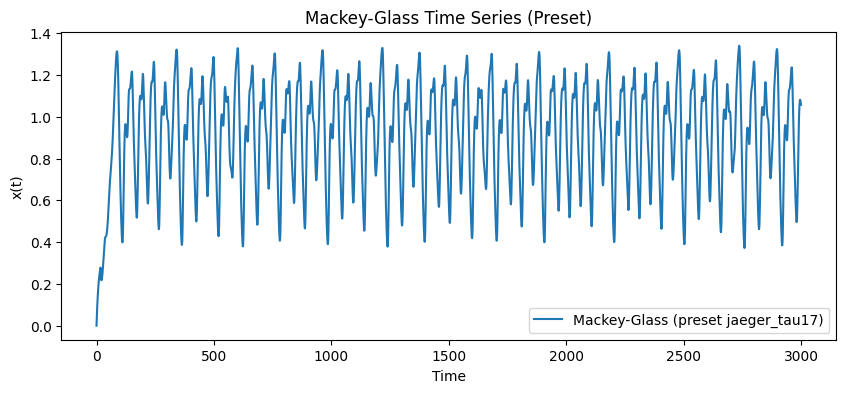

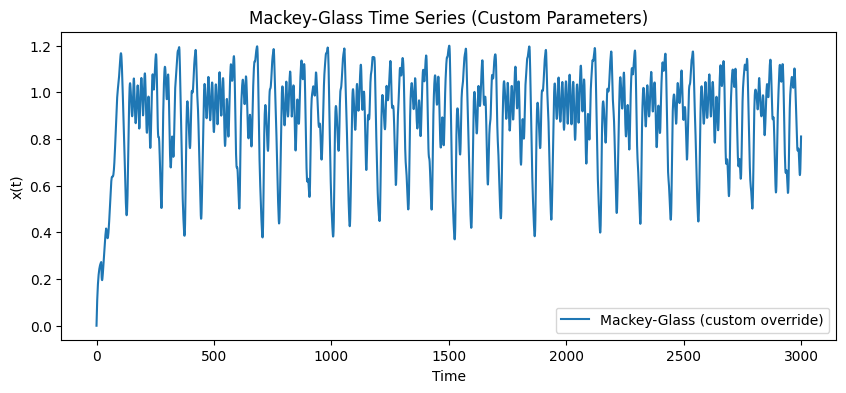

{'length': 3000, 'seed': 42, 'series_generated': True}

In [1]:
import matplotlib.pyplot as plt
from datasets.mackey_glass import MackeyGlassDataset

# Example 1: use a preset
mg = MackeyGlassDataset(preset="jaeger_tau17")
series = mg.generate()

plt.figure(figsize=(10, 4))
plt.plot(series, label="Mackey-Glass (preset jaeger_tau17)")
plt.xlabel("Time")
plt.ylabel("x(t)")
plt.title("Mackey-Glass Time Series (Preset)")
plt.legend()
plt.show()


# Example 2: custom parameters overriding preset
mg_custom = MackeyGlassDataset(preset="jaeger_tau17", tau=30, beta=0.17, delta_t=1.5)
series_custom = mg_custom.generate()

plt.figure(figsize=(10, 4))
plt.plot(series_custom, label="Mackey-Glass (custom override)")
plt.xlabel("Time")
plt.ylabel("x(t)")
plt.title("Mackey-Glass Time Series (Custom Parameters)")
plt.legend()
plt.show()
mg_custom.info()
